In [17]:
import numpy as np
import pandas as pd
#from bqplot import (
#    Axis, ColorAxis, LinearScale, DateScale, DateColorScale, OrdinalScale,
#    OrdinalColorScale, ColorScale, Scatter, Lines, Figure, Tooltip
#)
import bqplot as bq
from ipywidgets import Label 

import ipywidgets as widgets
from ipywidgets import ToggleButtons, VBox
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

## Image

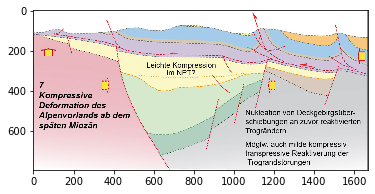

In [26]:
image_pat = '../figures/image_nagra_nab14-17.png'
import matplotlib.image as mimg
img = mimg.imread(image_pat)

with open(image_pat, 'rb') as f:
    raw_image = f.read()

ipyimage = widgets.Image(value=raw_image, format='png')
ipyimage

plt.imshow(img)

In [19]:
im = Image.open('image_nagra_nab14-17.png')
type(ipyimage)

FileNotFoundError: [Errno 2] No such file or directory: 'image_nagra_nab14-17.png'

## Image 

In [20]:
xdim = np.array([0,30.])
ydim = np.array([-6.5, 1.])

scales = {'x': bq.LinearScale(min=np.min(xdim), max=np.max(xdim)), 
          'y': bq.LinearScale(min=np.min(ydim), max=np.max(ydim))}
image = bq.Image(x=xdim, y=ydim, image=ipyimage, scales=scales, enable_hover=False)

NameError: name 'ipyimage' is not defined

## Scatter Plot

In [21]:
cord=['DodgerBlue', 'SeaGreen', 'Yellow', 'HotPink', 'OrangeRed']
layers = ['GrabenFill', 'Yellow', 'Purple', 'Blue', 'MainFault']
#c_ord = OrdinalColorScale(colors=['DodgerBlue', 'SeaGreen', 'Yellow', 'HotPink', 'OrangeRed'])
scat = bq.Scatter(x=[], y=[], scales=scales, colors=cord, enable_move=True)

#linJoin = bq.Lines(x=scat.x, y=scat.y, scales=scales, colors=['blue'], close_path=False)


interact_control = ToggleButtons(options=['Add', 'Delete'],
                                style={'button_width': '120px'})
#set_layer = widgets.Dropdown(description='Layer', options=tickers, value=layers[0])

def change_interact(shape):
    interact_parameters = {
        'Add': {'interactions': {'click': 'add'},
               'enable_move': True},
        'Delete': {'interactions': {'click': 'delete'},
                  'enable_move': False},
        #'Change Layer': {'interactions': {'click': colors}}
    }
    for param, value in interact_parameters[interact_control.value].items():
        setattr(scat, param, value)
        
interact_control.observe(change_interact)

fig = bq.Figure(title='PC-cs', marks=[image, scat], padding_x=0, padding_y=0)
fig.axes = [bq.Axis(scale=scales['x']), bq.Axis(scale=scales['y'], orientation='vertical')]
VBox([fig, interact_control])



NameError: name 'image' is not defined

In [22]:
scat.colors = ['blue']

Works, if you click next to the image...

In [23]:
xy = np.stack([scat.x,scat.y],axis=1)
print(xy)

[]


In [24]:
np.savetxt('F6_left.dat', xy, fmt='%.5f', header='x z')

Problem is, this does not work well. New points cannot be added on top of the image.  
One has to click on the side of the plot (next to the image) and drag the point to its destination.  
Needs to be fixed...maybe by loading the image differently?